# Evaluation of the models
Since we have successfully trained the models, now we will use the model to predict the test dataset and evaluate their performances.

## 1. Define the paths

In [1]:
import os
BASE_DIR = r"G:\OneDrive\ML-MinorProject"
TEST_DIR = os.path.join(BASE_DIR, "data", "test")
MOBILENET_MODEL_PATH = os.path.join(BASE_DIR, "models", "mobilenet", "mobilenet_final_model.h5")
EFFICIENTNET_MODEL_PATH = os.path.join(BASE_DIR, "models", "efficientnet", "efficientnet_final_model.h5")

## 1. Load the models
the models are saved as efficientnet_final_model.h5 and mobilenet_final_model.h5

In [2]:
from tensorflow.keras.models import load_model

mobilenet_model = load_model(MOBILENET_MODEL_PATH)
efficientnet_model = load_model(EFFICIENTNET_MODEL_PATH)


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  NVIDIA GeForce GTX 1050 Ti, compute capability 6.1
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


### MobileNet summary

In [3]:
print("MobileNet summary: ")
mobilenet_model.summary()

MobileNet summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


### EfficientNet summary

In [4]:
print("EfficientNet summary: ")
efficientnet_model.summary()

EfficientNet summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 5,920,593
Trainable params: 5,859,985
Non-trainable params: 60,608
_________________________________________________________________


### Loading MobileNet's training history

In [9]:
import json
with open("G:\OneDrive\ML-MinorProject\models\mobilenet\mobilenet_training_history.json", "r") as f:
    mobilenet_history = json.load(f)

### Plotting MobileNet's training accuracy vs Validation accuracy

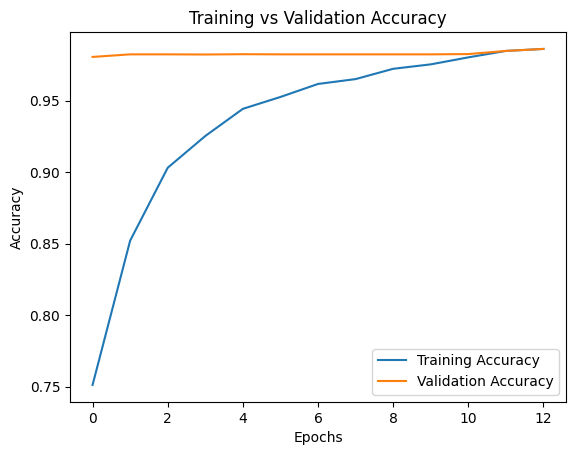

In [10]:
import matplotlib.pyplot as plt
plt.plot(mobilenet_history["accuracy"], label="Training Accuracy")
plt.plot(mobilenet_history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

### Loading EfficientNet's training history

In [11]:
with open("G:\OneDrive\ML-MinorProject\models\efficientnet\efficientnet_training_history.json", "r") as f:
    efficientnet_history = json.load(f)

### Plotting EfficientNet's training accuracy vs validation accuracy

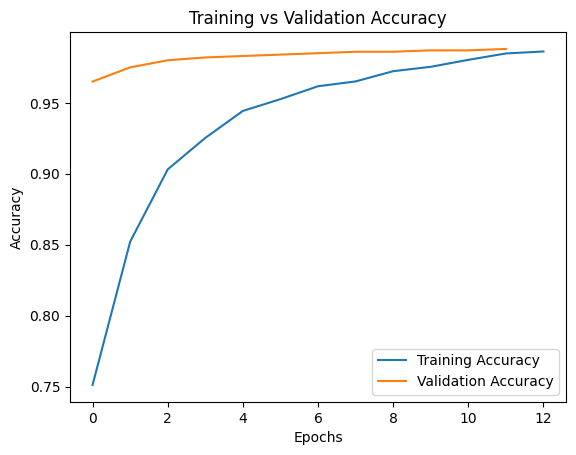

In [12]:

plt.plot(efficientnet_history["accuracy"], label="Training Accuracy")
plt.plot(efficientnet_history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## 2. Load and preprocess test data
We will now load the test data by using ImageDataGenerator to deal with class imbalance

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(BASE_DIR, "ISIC-2020 Dataset", "processed_test" ) 
img_size = (224, 224)  # Ensure consistency with training

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=16,
    class_mode="binary",
    shuffle=False
)

Found 10982 images belonging to 2 classes.


## 3. Make predictions

### 3.1 MobileNet predictions

In [14]:
mobilenet_preds = mobilenet_model.predict(test_generator)
mobilenet_preds = (mobilenet_preds > 0.5).astype(int)

687/687 [==============================] - 698s 1s/step


### 3.2 EfficientNet predictions

In [15]:
efficientnet_preds = efficientnet_model.predict(test_generator)
efficientnet_preds = (efficientnet_preds > 0.5).astype(int)

687/687 [==============================] - 745s 1s/step


## 4. Compute accuracies of each models

In [39]:
from sklearn.metrics import accuracy_score

true_labels = test_generator.classes

mobilenet_acc = accuracy_score(true_labels, mobilenet_preds)
efficientnet_acc = accuracy_score(true_labels, efficientnet_preds)

print("MobileNet Accuracy:", mobilenet_acc)
print("EfficientNet Accuracy:", efficientnet_acc)


MobileNet Accuracy: 0.9750500819522856
EfficientNet Accuracy: 0.9727736295756693


### plotting the graph

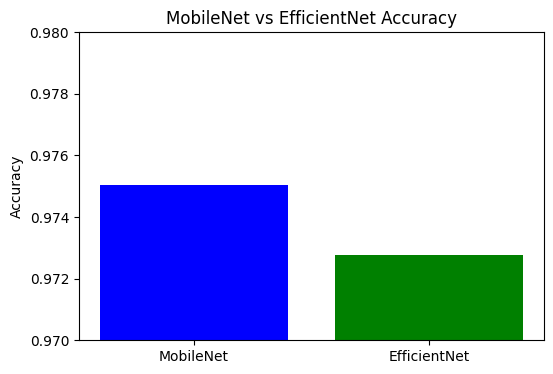

In [32]:
plt.figure(figsize=(6, 4))
models = ['MobileNet', 'EfficientNet']
accuracies = [mobilenet_acc, efficientnet_acc]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0.97, 0.98)
plt.ylabel('Accuracy')
plt.title('MobileNet vs EfficientNet Accuracy')
plt.show()